In [132]:
import os
import pandas as pd
import numpy as np
import requests
from io import StringIO
# !pip install tweepy --user
import tweepy
import timeit
import json
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<h1>Gathering Data</h1>

**Twitter Archive file downloaded manually**

In [133]:
twitter_archive = pd.read_csv(r'twitter-archive-enhanced.csv')

**Image predictions table downloaded programmatically**

In [19]:

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
resp = response.content
with open('image-predictions.tsv',mode='wb') as file:
    file.write(resp)

In [25]:
image_predictions=pd.read_csv('image-predictions.tsv',sep='\t')

In [134]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [135]:
image_predictions.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [136]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [137]:
twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [138]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

**Get additional Data from Twitter using Tweepy library**

In [1]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

# tweet_id status with live tweets will be stored in live_tweets list
live_tweets = []
# tweet_id with deleted tweets will be noted down in lost_tweets
lost_tweets = []

for tweet_id in twitter_archive['tweet_id']:   
    try:
    
        live_tweets.append(api.get_status(tweet_id))
    except Exception as e:
        lost_tweets.append(tweet_id)

In [42]:
#Get the json text from status object
json_list = []
for tweet_id_json in live_tweets:
    json_list.append(tweet_id_json._json)

In [46]:
#we write this list into a txt file
with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(json_list, indent=4))

In [139]:
#Read json text into dataframe, line by line
df_json = []
with open('tweet_json.txt',encoding='utf-8') as file:
    tweetfile = json.load(file)
    for line in tweetfile:
        
        id_str = line['id']
        retweet_count = line['retweet_count']
        favorite_count = line['favorite_count']
        created_at = line['created_at']
        text = line['text']
        favorited = line['favorited']
        retweeted = line['retweeted']
        df_json.append({'retweet_count' : retweet_count,
                  'favorite_count' : favorite_count,
                  'created_at' : created_at,
                  'id' : id_str,
                   'text':text,
                   'favorited':favorited,
                    'retweeted':retweeted})
        
df_json = pd.DataFrame(df_json, columns = ['id', 'retweet_count', 'favorite_count', 'created_at','text','favorited','retweeted'])

In [48]:
#Number 0f lost tweets
len(lost_tweets)

30

In [140]:
df_json.columns

Index(['id', 'retweet_count', 'favorite_count', 'created_at', 'text',
       'favorited', 'retweeted'],
      dtype='object')

<h1>ASSESSING DATA</h1>

**Programmatic Assessment**

In [141]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [142]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2326 non-null   int64 
 1   retweet_count   2326 non-null   int64 
 2   favorite_count  2326 non-null   int64 
 3   created_at      2326 non-null   object
 4   text            2326 non-null   object
 5   favorited       2326 non-null   bool  
 6   retweeted       2326 non-null   bool  
dtypes: bool(2), int64(3), object(2)
memory usage: 95.5+ KB


In [143]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [144]:
twitter_archive['expanded_urls'].head(10)

0                                                                    https://twitter.com/dog_rates/status/892420643555336193/photo/1
1                                                                    https://twitter.com/dog_rates/status/892177421306343426/photo/1
2                                                                    https://twitter.com/dog_rates/status/891815181378084864/photo/1
3                                                                    https://twitter.com/dog_rates/status/891689557279858688/photo/1
4    https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1
5                                                                    https://twitter.com/dog_rates/status/891087950875897856/photo/1
6                        https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1
7    https://twitter.com/dog_rates/status/890729181411237888/photo/1,

In [145]:
twitter_archive['retweeted_status_id'].value_counts().sum()

181

In [146]:
twitter_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [147]:
df_json.columns


Index(['id', 'retweet_count', 'favorite_count', 'created_at', 'text',
       'favorited', 'retweeted'],
      dtype='object')

**Visual Assessment**

In [148]:
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2162,669393256313184256,NaN,NaN,2015-11-25 05:52:43 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Ronduh. She's a Finnish Checkered Blitzkrieg. Ears look fake. Shoes on point. 10/10 would pet extra well https://t.co/juktj5qiaD,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669393256313184256/photo/1,10,10,Ronduh,None,None,None,None
1291,708119489313951744,NaN,NaN,2016-03-11 02:36:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cooper. He basks in the glory of rebellion. 9/10 probably a preteen https://t.co/kDamUfeIpm,NaN,NaN,NaN,https://twitter.com/dog_rates/status/708119489313951744/photo/1,9,10,Cooper,None,None,None,None
1542,689599056876867584,NaN,NaN,2016-01-20 00:03:21 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we see 33 dogs posing for a picture. All get 11/10 for superb cooperation https://t.co/TRAri5iHzd,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689599056876867584/photo/1,11,10,None,None,None,None,None
1765,678410210315247616,NaN,NaN,2015-12-20 03:02:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Jerome. He can shoot french fries out of his mouth at insane speeds. Deadly af. 10/10 https://t.co/dIy88HwrX8,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678410210315247616/photo/1,10,10,Jerome,None,None,None,None
1674,682259524040966145,NaN,NaN,2015-12-30 17:58:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He's an Iglesias Hufflepoof. Quite the jokester. Takes it too far sometimes. Can be very hurtful. 9/10 https://t.co/i5TeG0KYcW,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682259524040966145/photo/1,9,10,Jax,None,None,None,None


In [149]:
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
557,677687604918272002,https://pbs.twimg.com/media/CWehRdEWIAAySyO.jpg,1,Pembroke,0.573047,True,sunglasses,0.126758,False,golden_retriever,0.108047,True
1091,719367763014393856,https://pbs.twimg.com/media/Cfu1KSRXEAACC5X.jpg,1,swing,0.171486,False,soft-coated_wheaten_terrier,0.050971,True,Tibetan_terrier,0.047759,True
1439,774639387460112384,https://pbs.twimg.com/media/CsASZqRW8AA3Szw.jpg,1,Walker_hound,0.627593,True,basenji,0.128705,True,Ibizan_hound,0.126282,True
1361,761227390836215808,https://pbs.twimg.com/media/CpBsRleW8AEfO8G.jpg,1,cougar,0.306512,False,French_bulldog,0.280802,True,boxer,0.054523,True
1151,732375214819057664,https://pbs.twimg.com/media/CinrX2EWkAABDYt.jpg,1,tennis_ball,0.998673,False,basset,0.000547,True,golden_retriever,0.000360,True


In [150]:
df_json.sample(5)

,id,retweet_count,favorite_count,created_at,text,favorited,retweeted
694,784057939640352768,10403,28202,Thu Oct 06 15:49:14 +0000 2016,This is Balto. He's very content. Legendary tongue slippage. 12/10 would pet forever https://t.co/T7Jr4Gw4sC,False,False
1722,678991772295516161,1027,2083,Mon Dec 21 17:33:48 +0000 2015,If your Monday isn't going so well just take a look at this. Both 12/10 https://t.co/GJT6SILPGU,False,False
11,889880896479866881,4188,24631,Tue Jul 25 16:11:53 +0000 2017,This is Bruno. He is a service shark. Only gets out of the water to assist you. 13/10 terrifyingly good boy https://t.co/u1XPQMl29g,False,False
1315,704761120771465216,2652,6155,Tue Mar 01 20:11:59 +0000 2016,This pupper killed this great white in an epic sea battle. Now wears it as a trophy. Such brave. Much fierce. 13/10 https://t.co/Lu0ECu5tO5,False,False
314,833124694597443584,4476,19077,Sun Feb 19 01:23:00 +0000 2017,This is Gidget. She's a spy pupper. Stealthy as h*ck. Must've slipped pup and got caught. 12/10 would forgive then… https://t.co/qZPvwdZ3YH,False,False


In [151]:
twitter_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [152]:
twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [153]:
image_predictions['p1'].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

**No Duplicate Values**

In [154]:
df_json.duplicated().sum()

0

In [155]:
twitter_archive.duplicated().sum()

0

In [156]:
image_predictions.duplicated().sum()

0

<h2>DATA ISSUES</h2>

<h3>QUALITY ISSUES</h3>

**twitter_archive**

VALIDITY ISSUE: Some rows have decimal ratings, this does not conform to the rating schema.

VALIDITY ISSUE: There are some rows with multiple dog stages

ACCURACY ISSUE: The `rating_denominator` column has denominators other than 10

ACCURACY ISSUE: The `rating_numerator` has values higher than 15 and lower than 7

CONSISTENCY ISSUE: The `name` column has some values without a capitalized first letter. 

COMPLETENESS ISSUE: For columns {in_reply_to_status_id , in_reply_to_user_id, retweeted_status_user_id,  retweeted_status_timestamp,} Are not useful columns. 

 
**df_json**

df_json - COMPLETENESS: There are 30 missing data i.e. Data was probably deleted as at the time of request.

df_json - Remove columns that aren't useful to analysis

df_json - Change `id` column to `tweet_id`

**image_predictions**

image_predictions - CONSISTENCY ISSUE: The columns {`p1`,`p2` and `p3`} has some values without a capitalized first letter. 


image_predictions - CONSISTENCY ISSUE: The column names are not descriptive enough




**TIDY ISSUES**

twitter_archive - Columns 'doggo', 'floofer', 'pupper', 'puppo' in twitter_archive should be a single column

df_json, twitter_archive -  The dataframes should be joined at their end. 

<h1>Cleaning Data</h1>

In [157]:
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean  = image_predictions.copy()
df_json_clean = df_json.copy()

twitter_archive -VALIDITY ISSUE: Some rows have decimal ratings, this does not conform to the rating schema. 

**define**

Use python regex to check for rows with decimal ratings then correct them. 

**code**

In [158]:
twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['tweet_id','text', 'rating_numerator','rating_denominator']]

C:\Users\abdul\AppData\Local\Temp/ipykernel_6288/2548852241.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['tweet_id','text', 'rating_numerator','rating_denominator']]


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


I'll round down all ratings to ensure consistency.

for tweet_id 883482846933004288, 13.5/10 will be 13/10

for tweet_id 832215909146226688, 9.75/10 will be 9/10

for tweet_id 786709082849828864, 9.75/10 will be 9/10

for tweet_id 778027034220126208, 11.27/10 will be 11/10

for tweet_id 681340665377193984, 9.5/10 will be 9/10

for tweet_id 680494726643068929, 11.26/10 will be 11/10

In [159]:
#The issue is small enough to fix manually
tweets = [883482846933004288,832215909146226688,786709082849828864,778027034220126208,681340665377193984,680494726643068929]
int_list = [13,9,9,11,9,11]

n= 0
for tweet in tweets:
    
    twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] ==  tweet,['rating_numerator']] = int_list[n]
    n+=1

**test**

In [160]:
#check if the fix was successful
twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['tweet_id','text', 'rating_numerator','rating_denominator']]

C:\Users\abdul\AppData\Local\Temp/ipykernel_6288/1367491512.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['tweet_id','text', 'rating_numerator','rating_denominator']]


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13,10
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",9,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11,10


twitter_archive - ACCURACY ISSUE: The rating_denominator column has denominators other than 10


**Define**

Check text for rating info for correct rating, then delete those rows without a rating



**Code**

In [161]:
df_temp = twitter_archive_clean[['tweet_id','text','rating_denominator','rating_numerator']]
pd.set_option('display.max_colwidth', None)
df_temp.loc[df_temp['rating_denominator']!=10, :]

,tweet_id,text,rating_denominator,rating_numerator
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",0,960
342,832088576586297345,@docmisterio account started on 11/15/15,15,11
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,70,84
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,7,24
784,775096608509886464,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",11,9
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,150,165
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",11,9
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,170,204
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,20,4
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50


This problem occurred due to the reasons below:

1. The data was captured wrongly from the `text` column
2. Some tweets used different scales to rate the dogs
3. Some tweets aren't ratings at all

In [162]:
#1. Change data recorded wrong 
tweet_id_list = [835246439529840640, 775096608509886464,740373189193256964, 722974582966214656, 716439118184652801, 682962037429899265, 666287406224695296]
numerator_list = [13, 14, 14, 13, 11,10, 9]
n= 0
for tweet in tweet_id_list:
    
    twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] ==  tweet,['rating_denominator']] = 10
    twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] ==  tweet,['rating_numerator']] = numerator_list[n]
    n+=1

2. We can infer from the `text` column context that n/10 is a factor of scores like 84/70,165/150, 204/170. where n is a number from 9 to 15. Therefore we'd extract the true scores from these scaled up scores.

for tweet_id 820690176645140481: 84/70 - Divided by 7 -
12/10

758467244762497024: 165/150 - Divided by 15 -
11/10

731156023742988288: 204/170 - Divided by 17 - 12/10

713900603437621249: 99/90 - divided by 9 - 11/10

710658690886586372: 80/80 - divided by 8 - 10/10

709198395643068416: 45/50 - divided by 5 - 9/10

704054845121142784: 60/50 - divided by 5 - 12/10

697463031882764288: 44/40 - divided by 4 - 11/10

684225744407494656: 143/130 - divided by 13 - 11/10

684222868335505415: 121/110 - divided by 11 - 11/10

677716515794329600: 144/120 - divided by 12 - 12/10

675853064436391936: 88/80 - divided by 8 - 11/10

numerator_list = [12, 11,12,11,10,9,12,11,11,11,12,11]

tweet_id_list = [820690176645140481,758467244762497024, 731156023742988288, 713900603437621249, 710658690886586372, 709198395643068416, 704054845121142784, 697463031882764288,  684225744407494656, 684222868335505415, 677716515794329600, 675853064436391936 ]

In [163]:
tweet_id_list = [820690176645140481,758467244762497024, 731156023742988288, 
                 713900603437621249, 710658690886586372, 709198395643068416,
                 704054845121142784, 697463031882764288,  684225744407494656, 
                 684222868335505415, 677716515794329600, 675853064436391936 ]
numerator_list = [12, 11,12,11,10,9,12,11,11,11,12,11]
n =0
for tweet in tweet_id_list:
    twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] ==  tweet,['rating_denominator']] = 10
    twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] ==  tweet,['rating_numerator']] = numerator_list[n]
    n+=1

In [164]:
#3. We'll delete the remaining records as they aren't ratings
twitter_archive_clean.drop([342,516,1598,1663], inplace = True)

**test**

In [165]:
twitter_archive_clean.loc[twitter_archive_clean['rating_denominator']!=10, :]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [166]:
twitter_archive_clean.shape

(2352, 17)

twitter_archive - CONSISTENCY ISSUE: The `name` column has some values without a capitalized first letter

**define**

use capitalize() function to make them consistent

**code**

In [167]:
twitter_archive_clean['name'] = twitter_archive_clean['name'].str.capitalize()

**test**

In [168]:
twitter_archive_clean[['name']].sample(10)

,name
1397,None
1587,None
124,Cooper
148,None
1836,None
2060,None
997,Duke
500,Toby
410,Wyatt
1412,Cece


twitter_archive - COMPLETENESS ISSUE: Columns {in_reply_to_status_id , in_reply_to_user_id, retweeted_status_user_id, retweeted_status_timestamp} Are not useful columns.

**define**

Use the drop function to remove unnecessary columns

**code**

In [169]:
twitter_archive_clean = twitter_archive_clean.drop(columns  =
                           ['in_reply_to_status_id',
                            'retweeted_status_user_id','retweeted_status_timestamp','in_reply_to_user_id']
                          )

**test**

In [170]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


twitter_archive - VALIDITY ISSUE: There are some rows with multiple dog stages

twitter_archive - Columns 'doggo', 'floofer', 'pupper', 'puppo' in twitter_archive should be a single column

**define**

create unique values for dogs with multiple stages. 

Create a single column for the doggo, floofer, pupper and puppo columns.

Drop doggo, floofer, pupper and puppo columns

**code**

In [171]:
# handle none
twitter_archive_clean.doggo.replace('None', '', inplace=True)
twitter_archive_clean.floofer.replace('None', '', inplace=True)
twitter_archive_clean.pupper.replace('None', '', inplace=True)
twitter_archive_clean.puppo.replace('None', '', inplace=True)

# merge into a single column
twitter_archive_clean['dog_stage'] = twitter_archive_clean.doggo + twitter_archive_clean.floofer + twitter_archive_clean.pupper + twitter_archive_clean.puppo

# handle multiple stages
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

# handle missing values
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == '', 'dog_stage'] = np.nan

In [172]:
#drop these columns
twitter_archive_clean.drop(columns = ['doggo','floofer','pupper','puppo'],inplace=True)

In [173]:
twitter_archive_clean['dog_stage'].value_counts()

pupper            245
doggo              83
puppo              29
doggo, pupper      12
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

In [174]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2352 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tweet_id             2352 non-null   int64  
 1   timestamp            2352 non-null   object 
 2   source               2352 non-null   object 
 3   text                 2352 non-null   object 
 4   retweeted_status_id  181 non-null    float64
 5   expanded_urls        2296 non-null   object 
 6   rating_numerator     2352 non-null   int64  
 7   rating_denominator   2352 non-null   int64  
 8   name                 2352 non-null   object 
 9   dog_stage            380 non-null    object 
dtypes: float64(1), int64(3), object(6)
memory usage: 202.1+ KB


df_json - Remove columns that aren't useful for analysis



**define**

use the drop function to remove those columns

**code**

In [175]:
df_json_clean= df_json_clean.drop(columns = ['favorited','retweeted',
                            ])

**test**

In [176]:
df_json_clean.head()

,id,retweet_count,favorite_count,created_at,text
0,892420643555336193,7046,33914,Tue Aug 01 16:23:56 +0000 2017,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
1,892177421306343426,5322,29398,Tue Aug 01 00:17:27 +0000 2017,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boop… https://t.co/aQFSeaCu9L"
2,891815181378084864,3501,22111,Mon Jul 31 00:18:03 +0000 2017,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike.… https://t.co/r0YlrsGCgy
3,891689557279858688,7257,37029,Sun Jul 30 15:58:51 +0000 2017,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ
4,891327558926688256,7799,35398,Sat Jul 29 16:00:24 +0000 2017,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected a… https://t.co/0g0KMIVXZ3"


df_json - Change id column to tweet_id

**define**

use rename function to change id to tweet_id

**code**

In [177]:
df_json_clean.rename(columns = {"id":"tweet_id"},inplace=True)

**test**

In [178]:
df_json_clean.head()

,tweet_id,retweet_count,favorite_count,created_at,text
0,892420643555336193,7046,33914,Tue Aug 01 16:23:56 +0000 2017,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
1,892177421306343426,5322,29398,Tue Aug 01 00:17:27 +0000 2017,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boop… https://t.co/aQFSeaCu9L"
2,891815181378084864,3501,22111,Mon Jul 31 00:18:03 +0000 2017,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike.… https://t.co/r0YlrsGCgy
3,891689557279858688,7257,37029,Sun Jul 30 15:58:51 +0000 2017,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ
4,891327558926688256,7799,35398,Sat Jul 29 16:00:24 +0000 2017,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected a… https://t.co/0g0KMIVXZ3"


image_predictions - CONSISTENCY ISSUE: The columns {p1,p2 and p3} has some values without a capitalized first letter.

**define**

use the capitalize function to make the columns consistent

**code**

In [179]:
image_predictions_clean['p1'] = image_predictions_clean['p1'].str.capitalize()
image_predictions_clean['p2'] = image_predictions_clean['p1'].str.capitalize()
image_predictions_clean['p3'] = image_predictions_clean['p1'].str.capitalize()

**test**

In [180]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Welsh_springer_spaniel,0.156665,True,Welsh_springer_spaniel,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Redbone,0.074192,True,Redbone,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,German_shepherd,0.138584,True,German_shepherd,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,Rhodesian_ridgeback,0.360687,True,Rhodesian_ridgeback,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,Miniature_pinscher,0.243682,True,Miniature_pinscher,0.154629,True


image_predictions - CONSISTENCY ISSUE: The column names are not descriptive enough


**define**

rename every column name using rename function

**code**

In [181]:
image_predictions_clean.rename(columns={'jpg_url':'image_url','img_num':'image_number','p1':'prediction_one', 'p1_conf': 'confidence_one', 'p1_dog': 'dog_one',
                                  'p2': 'prediction_two', 'p2_conf': 'confidence_two', 'p2_dog': 'dog_two',
                                  'p3': 'prediction_three', 'p3_conf': 'confidence_three', 'p3_dog': 'dog_three'}, inplace = True)

**test**

In [182]:
image_predictions_clean.head()

,tweet_id,image_url,image_number,prediction_one,confidence_one,dog_one,prediction_two,confidence_two,dog_two,prediction_three,confidence_three,dog_three
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Welsh_springer_spaniel,0.156665,True,Welsh_springer_spaniel,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Redbone,0.074192,True,Redbone,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,German_shepherd,0.138584,True,German_shepherd,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,Rhodesian_ridgeback,0.360687,True,Rhodesian_ridgeback,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,Miniature_pinscher,0.243682,True,Miniature_pinscher,0.154629,True


<h2>TIDINESS CLEAN<h2>

df_json, twitter_archive, and image_predictions -  The dataframes should be joined at their end. 

**define**

use merge function to join the three datasets together

**code**

In [183]:
tweet_master = pd.merge(twitter_archive_clean,image_predictions_clean, how='left', on = ['tweet_id'])

tweet_master = tweet_master.loc[tweet_master['image_url'].notnull(),:]

In [184]:
twitter_archive_master = pd.merge(tweet_master, df_json_clean, 
                      how = 'inner', on = ['tweet_id'])

In [185]:
#drop redundant column
twitter_archive_master.drop(columns = ['text_y'],inplace = True)
#rename created column
twitter_archive_master.rename(columns  = {"text_x":"text"},inplace=True)

**test**

In [186]:
twitter_archive_master.head()

,tweet_id,timestamp,source,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,...,dog_one,prediction_two,confidence_two,dog_two,prediction_three,confidence_three,dog_three,retweet_count,favorite_count,created_at
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,...,False,Orange,0.085851,False,Orange,0.076110,False,7046,33914,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,...,True,Chihuahua,0.090647,True,Chihuahua,0.068957,True,5322,29398,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN,...,True,Chihuahua,0.078253,True,Chihuahua,0.031379,True,3501,22111,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN,...,False,Paper_towel,0.168086,True,Paper_towel,0.040836,False,7257,37029,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN,...,True,Basset,0.225770,True,Basset,0.175219,True,7799,35398,Sat Jul 29 16:00:24 +0000 2017


In [187]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2055 entries, 0 to 2054
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tweet_id             2055 non-null   int64  
 1   timestamp            2055 non-null   object 
 2   source               2055 non-null   object 
 3   text                 2055 non-null   object 
 4   retweeted_status_id  71 non-null     float64
 5   expanded_urls        2055 non-null   object 
 6   rating_numerator     2055 non-null   int64  
 7   rating_denominator   2055 non-null   int64  
 8   name                 2055 non-null   object 
 9   dog_stage            318 non-null    object 
 10  image_url            2055 non-null   object 
 11  image_number         2055 non-null   float64
 12  prediction_one       2055 non-null   object 
 13  confidence_one       2055 non-null   float64
 14  dog_one              2055 non-null   object 
 15  prediction_two       2055 non-null   o

<h1>STORE DATA</h1>

We'll store the data as a csv file called `twitter_archive_master.csv`

In [118]:
twitter_archive_master.to_csv('twitter_archive_master.csv',index=False, encoding = 'utf-8')

<h1>Analyze and Visualize Data</h1>

In [188]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

In [189]:
#create a column combining the score from retweet and favorite
twitter_archive_master['engagement_score'] = twitter_archive_master['retweet_count'] + twitter_archive_master['favorite_count']

<h3>1. Top 10 Highest rated dog breeds on average</h3>

These are dog breeds which receive the highest average rating, we'll only consider dog breeds with at least 20 ratings 

In [190]:
# #groupby dog breed and get the average rating 
dfbreed = twitter_archive_master.groupby(['prediction_one'], as_index = False)['rating_numerator'].mean()
dfbreedcount = twitter_archive_master.groupby(['prediction_one'], as_index = False)['rating_numerator'].count()

# #merge the dfbreed and dfbreedcount dataframes
dfbreed = dfbreed.merge(dfbreedcount, how ='inner',on='prediction_one')
dfbreed.rename(columns = {"rating_numerator_x":"average_rating","rating_numerator_y":"rating_count"},inplace=True)
dfbreed.sort_values(by="average_rating",ascending = False,inplace =True)

# #filter the dataset for dog breeds with at least 20 ratings
dfbreed = dfbreed.query('rating_count >=20')
dfbreed.reset_index(drop=True,inplace = True)


In [191]:
dfbreed10 = dfbreed.head(10)
dfbreed10.rename(columns = {"prediction_one":"dog_breed"},inplace=True)
dfbreed10

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,dog_breed,average_rating,rating_count
0,Samoyed,11.738095,42
1,Golden_retriever,11.637584,149
2,Chow,11.636364,44
3,Pembroke,11.443182,88
4,Cocker_spaniel,11.400000,30
5,Siberian_husky,11.300000,20
6,French_bulldog,11.240000,25
7,Pomeranian,11.135135,37
8,Labrador_retriever,11.114583,96
9,Toy_poodle,11.105263,38


Text(0, 0.5, 'average rating')

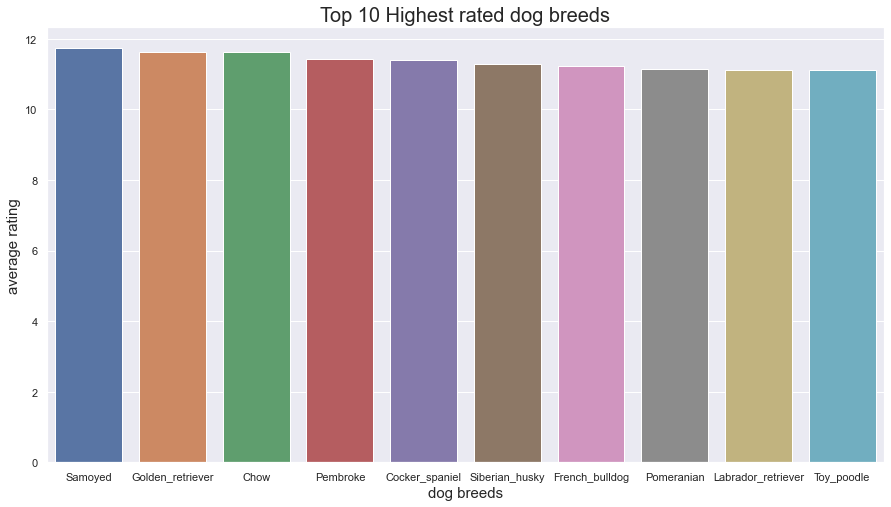

In [192]:
#Visualize the count
sns.set(rc = {'figure.figsize':(15,8)})
dogs= sns.barplot(x='dog_breed', y='average_rating', data = dfbreed10)
dogs.set_title('Top 10 Highest rated dog breeds',fontdict = { 'fontsize': 20})
dogs.set_xlabel('dog breeds',fontdict = { 'fontsize': 15} )
dogs.set_ylabel('average rating',fontdict = { 'fontsize': 15} )

<h3>2. Most popular dog sizes</h3>

Which dog size got the most attention? 

In [193]:
dfsize =twitter_archive_master.groupby(['dog_stage'], as_index = False)['engagement_score'].sum()
dfsize.sort_values(by="engagement_score",ascending = False,inplace =True)
dfsize = dfsize.drop(labels=4, axis=0)
dfsize.reset_index(drop=True,inplace=True)

In [194]:
dfsize

,dog_stage,engagement_score
0,pupper,1683634
1,doggo,1523702
2,puppo,553944
3,"doggo, pupper",158329
4,"doggo, puppo",58248
5,"doggo, floofer",17695


<h3>3. Top 10 most popular dog breeds</h3>

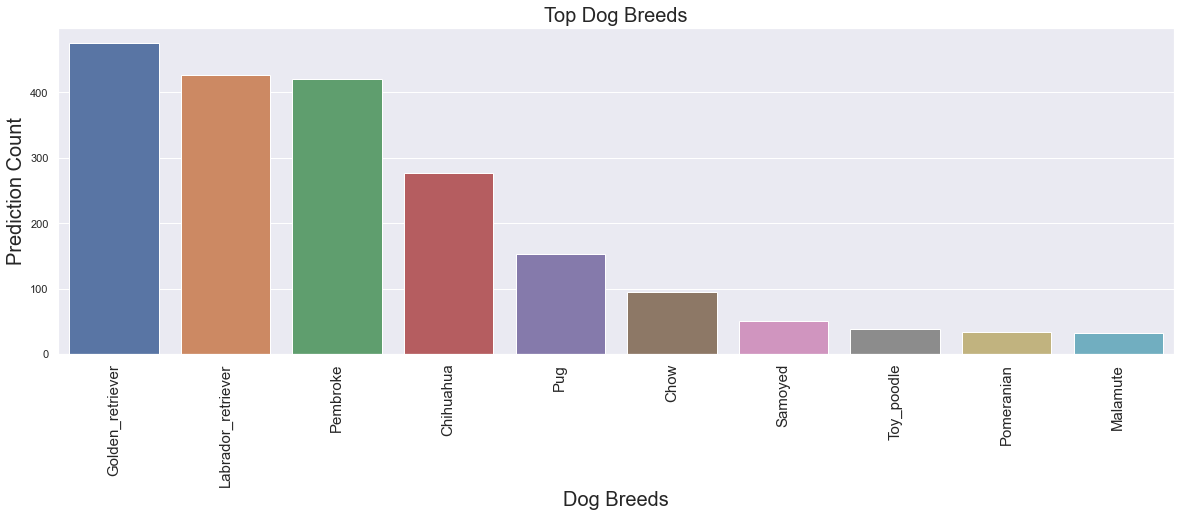

In [195]:
plt.figure(figsize = (20,6))

ax = sns.barplot(x = twitter_archive_master['prediction_one'].value_counts()[0:10].index,
            y =twitter_archive_master['rating_numerator'].value_counts()[0:10],
            data = twitter_archive_master);

ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize = 15);

plt.xlabel("Dog Breeds",fontsize = 20);
plt.ylabel("Prediction Count",fontsize = 20);
plt.title("Top Dog Breeds",fontsize = 20);

<h3>4. Does higher ratings correlate with higher favorite and retweet count?</h3> 

We'd plot a scatterplot and correlation matrix of  `combined_score` column and `ratings_numerator` column to determine this relationship

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<Figure size 1440x720 with 0 Axes>

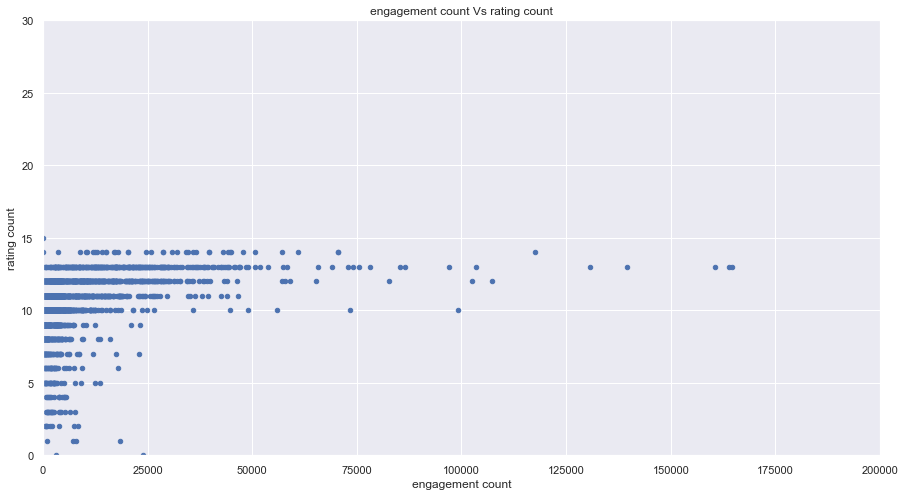

In [196]:
plt.figure(figsize=(20,10))
twitter_archive_master.plot(kind = 'scatter', x = 'engagement_score', y = 'rating_numerator')
plt.xlim((0,200000))
plt.ylim((0,30))
plt.xlabel('engagement count')
plt.ylabel('rating count')
plt.title('engagement count Vs rating count');


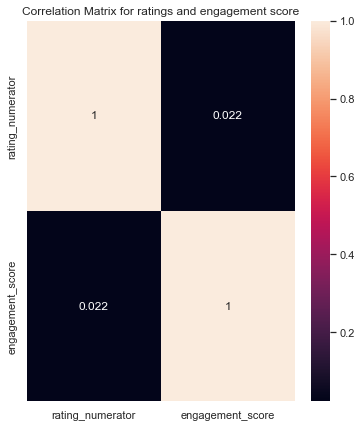

In [197]:
f,ax = plt.subplots(figsize=(6, 7))
sns.heatmap(twitter_archive_master[['rating_numerator', 'engagement_score']].corr(), annot=True)
plt.title('Correlation Matrix for ratings and engagement score');

From the scatterplot and correlation matrix above, we have determined that there is no meaningful relationship between the combined count of retweets and favorites and rating